In [33]:
from network import *

In [2]:
# 读取所有设备的IQ数据
device_files = {
    "bladerf": "../dataset/raw data/bladerf/bladerf.iq",
    "hackrf0": "../dataset/raw data/hackrf0/hackrf0.iq",
    "hackrf1": "../dataset/raw data/hackrf1/hackrf1.iq",
    "limesdr": "../dataset/raw data/limesdr/limesdr.iq"
}

all_data = []
all_labels = []

for label_idx, (device_name, file_path) in enumerate(device_files.items()):
    print(f"正在处理 {device_name} 的数据...",end="")
    # 读取数据
    data = load_iq_file(file_path)
    
    # 分段数据（将连续IQ数据分成固定长度的片段）
    segment_length = 1024  # 每个样本的IQ点数，根据需要调整
    num_segments = len(data) // segment_length
    segments = data[:num_segments * segment_length].reshape(num_segments, segment_length)
    
    # 添加到数据集
    all_data.append(segments)
    all_labels.append(np.full(num_segments, label_idx))
    
    print(f"✅处理完成，获取了 {num_segments} 个样本")

正在处理 bladerf 的数据...✅处理完成，获取了 48828 个样本
正在处理 hackrf0 的数据...✅处理完成，获取了 48828 个样本
正在处理 hackrf1 的数据...✅处理完成，获取了 48828 个样本
正在处理 limesdr 的数据...✅处理完成，获取了 48828 个样本


In [3]:
# 合并数据
X = np.vstack(all_data)
y = np.concatenate(all_labels)

# 分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"训练集样本数: {len(X_train)}")
print(f"测试集样本数: {len(X_test)}")

训练集样本数: 156249
测试集样本数: 39063


In [4]:
# 创建数据加载器
batch_size = 32
train_loader, test_loader, scalers = create_dataloaders(
    X_train, y_train, X_test, y_test, batch_size)

In [5]:
# 初始化模型
num_features = X_train.shape[1]  # 每个样本的IQ点数
num_classes = 4  # bladerf, hackrf0, hackrf1, limesdr
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = create_model(num_features, num_classes).to(device)

In [ ]:
# 加载之前训练好的模型参数（如果有）
# model.load_state_dict(torch.load('complex_cnn_model.pth'))

# 训练模型并记录准确率
train_accuracies, test_accuracies = train_and_evaluate(model, train_loader, test_loader, device)



第 1/30 轮


Epoch 1/30 [Train]: 100%|██████████| 4883/4883 [02:48<00:00, 28.97it/s]


♂️ trainLoss: 1.2806, trainAcc: 35.06%


Epoch 1/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 96.69it/s]


♀️ testLoss: 1.2895, testAcc: 34.13%
第 2/30 轮


Epoch 2/30 [Train]: 100%|██████████| 4883/4883 [02:48<00:00, 28.98it/s]


♂️ trainLoss: 0.5786, trainAcc: 70.57%


Epoch 2/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 96.29it/s]


♀️ testLoss: 0.3279, testAcc: 84.64%
第 3/30 轮


Epoch 3/30 [Train]: 100%|██████████| 4883/4883 [02:48<00:00, 28.97it/s]


♂️ trainLoss: 0.2663, trainAcc: 87.48%


Epoch 3/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 96.29it/s]


♀️ testLoss: 0.2485, testAcc: 88.17%
第 4/30 轮


Epoch 4/30 [Train]: 100%|██████████| 4883/4883 [02:48<00:00, 28.97it/s]


♂️ trainLoss: 0.2023, trainAcc: 91.18%


Epoch 4/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 96.20it/s]


♀️ testLoss: 0.7063, testAcc: 75.57%
第 5/30 轮


Epoch 5/30 [Train]: 100%|██████████| 4883/4883 [02:48<00:00, 28.96it/s]


♂️ trainLoss: 0.1646, trainAcc: 92.99%


Epoch 5/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 97.24it/s]


♀️ testLoss: 0.2578, testAcc: 88.19%
第 6/30 轮


Epoch 6/30 [Train]: 100%|██████████| 4883/4883 [02:47<00:00, 29.19it/s]


♂️ trainLoss: 0.1339, trainAcc: 94.41%


Epoch 6/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 97.52it/s]


♀️ testLoss: 0.0956, testAcc: 96.12%
第 7/30 轮


Epoch 7/30 [Train]: 100%|██████████| 4883/4883 [02:47<00:00, 29.16it/s]


♂️ trainLoss: 0.1195, trainAcc: 95.12%


Epoch 7/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 97.07it/s]


♀️ testLoss: 0.0781, testAcc: 96.99%
第 8/30 轮


Epoch 8/30 [Train]: 100%|██████████| 4883/4883 [02:46<00:00, 29.26it/s]


♂️ trainLoss: 0.1055, trainAcc: 95.73%


Epoch 8/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 98.10it/s]


♀️ testLoss: 0.0803, testAcc: 96.96%
第 9/30 轮


Epoch 9/30 [Train]: 100%|██████████| 4883/4883 [02:47<00:00, 29.15it/s]


♂️ trainLoss: 0.0981, trainAcc: 96.03%


Epoch 9/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 96.60it/s]


♀️ testLoss: 0.1318, testAcc: 94.54%
第 10/30 轮


Epoch 10/30 [Train]: 100%|██████████| 4883/4883 [02:48<00:00, 29.05it/s]


♂️ trainLoss: 0.0914, trainAcc: 96.33%


Epoch 10/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 96.68it/s]


♀️ testLoss: 0.0782, testAcc: 96.92%
第 11/30 轮


Epoch 11/30 [Train]: 100%|██████████| 4883/4883 [02:48<00:00, 29.04it/s]


♂️ trainLoss: 0.0854, trainAcc: 96.64%


Epoch 11/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 96.67it/s]


♀️ testLoss: 0.1009, testAcc: 95.92%
第 12/30 轮


Epoch 12/30 [Train]: 100%|██████████| 4883/4883 [02:46<00:00, 29.41it/s]


♂️ trainLoss: 0.0823, trainAcc: 96.73%


Epoch 12/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.00it/s]


♀️ testLoss: 0.0992, testAcc: 95.94%
第 13/30 轮


Epoch 13/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.06it/s]


♂️ trainLoss: 0.0779, trainAcc: 96.91%


Epoch 13/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.63it/s]


♀️ testLoss: 0.0797, testAcc: 96.88%
第 14/30 轮


Epoch 14/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.13it/s]


♂️ trainLoss: 0.0736, trainAcc: 97.11%


Epoch 14/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.49it/s]


♀️ testLoss: 0.1186, testAcc: 95.19%
第 15/30 轮


Epoch 15/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.13it/s]


♂️ trainLoss: 0.0696, trainAcc: 97.26%


Epoch 15/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.44it/s]


♀️ testLoss: 0.0506, testAcc: 98.11%
第 16/30 轮


Epoch 16/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.11it/s]


♂️ trainLoss: 0.0669, trainAcc: 97.40%


Epoch 16/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.25it/s]


♀️ testLoss: 0.0687, testAcc: 97.35%
第 17/30 轮


Epoch 17/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.13it/s]


♂️ trainLoss: 0.0633, trainAcc: 97.56%


Epoch 17/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.57it/s]


♀️ testLoss: 0.0468, testAcc: 98.19%
第 18/30 轮


Epoch 18/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.14it/s]


♂️ trainLoss: 0.0623, trainAcc: 97.58%


Epoch 18/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.59it/s]


♀️ testLoss: 0.0451, testAcc: 98.33%
第 19/30 轮


Epoch 19/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.13it/s]


♂️ trainLoss: 0.0600, trainAcc: 97.68%


Epoch 19/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.57it/s]


♀️ testLoss: 0.0351, testAcc: 98.71%
第 20/30 轮


Epoch 20/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.14it/s]


♂️ trainLoss: 0.0577, trainAcc: 97.74%


Epoch 20/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.54it/s]


♀️ testLoss: 0.0622, testAcc: 97.52%
第 21/30 轮


Epoch 21/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.13it/s]


♂️ trainLoss: 0.0545, trainAcc: 97.89%


Epoch 21/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.63it/s]


♀️ testLoss: 0.0329, testAcc: 98.77%
第 22/30 轮


Epoch 22/30 [Train]: 100%|██████████| 4883/4883 [02:41<00:00, 30.14it/s]


♂️ trainLoss: 0.0519, trainAcc: 97.99%


Epoch 22/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.78it/s]


♀️ testLoss: 0.0458, testAcc: 98.24%
第 23/30 轮


Epoch 23/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.14it/s]


♂️ trainLoss: 0.0512, trainAcc: 98.03%


Epoch 23/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.46it/s]


♀️ testLoss: 0.0778, testAcc: 96.95%
第 24/30 轮


Epoch 24/30 [Train]: 100%|██████████| 4883/4883 [02:41<00:00, 30.15it/s]


♂️ trainLoss: 0.0500, trainAcc: 98.09%


Epoch 24/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.68it/s]


♀️ testLoss: 0.0573, testAcc: 97.80%
第 25/30 轮


Epoch 25/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.14it/s]


♂️ trainLoss: 0.0487, trainAcc: 98.11%


Epoch 25/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.70it/s]


♀️ testLoss: 0.0482, testAcc: 98.12%
第 26/30 轮


Epoch 26/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.14it/s]


♂️ trainLoss: 0.0463, trainAcc: 98.20%


Epoch 26/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.53it/s]


♀️ testLoss: 0.0446, testAcc: 98.28%
第 27/30 轮


Epoch 27/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.13it/s]


♂️ trainLoss: 0.0462, trainAcc: 98.23%


Epoch 27/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.59it/s]


♀️ testLoss: 0.0925, testAcc: 96.60%
第 28/30 轮


Epoch 28/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.13it/s]


♂️ trainLoss: 0.0438, trainAcc: 98.31%


Epoch 28/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.61it/s]


♀️ testLoss: 0.0857, testAcc: 96.76%
第 29/30 轮


Epoch 29/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.14it/s]


♂️ trainLoss: 0.0421, trainAcc: 98.40%


Epoch 29/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.49it/s]


♀️ testLoss: 0.0416, testAcc: 98.43%
第 30/30 轮


Epoch 30/30 [Train]: 100%|██████████| 4883/4883 [02:42<00:00, 30.13it/s]


♂️ trainLoss: 0.0412, trainAcc: 98.42%


Epoch 30/30 [Test]: 100%|██████████| 1221/1221 [00:12<00:00, 100.54it/s]


♀️ testLoss: 0.0414, testAcc: 98.41%


RuntimeError: Parent directory ./models does not exist.

In [32]:
# 保存模型
torch.save(model.state_dict(), './models/complex_cnn_model_2.pth')

# 保存标准化器
torch.save(scalers, './models/scalers2.pth')

 # 获取测试集上的预测结果
y_pred, y_true = get_predictions(model, test_loader, device)

获取预测结果: 100%|██████████| 1221/1221 [00:12<00:00, 96.67it/s]


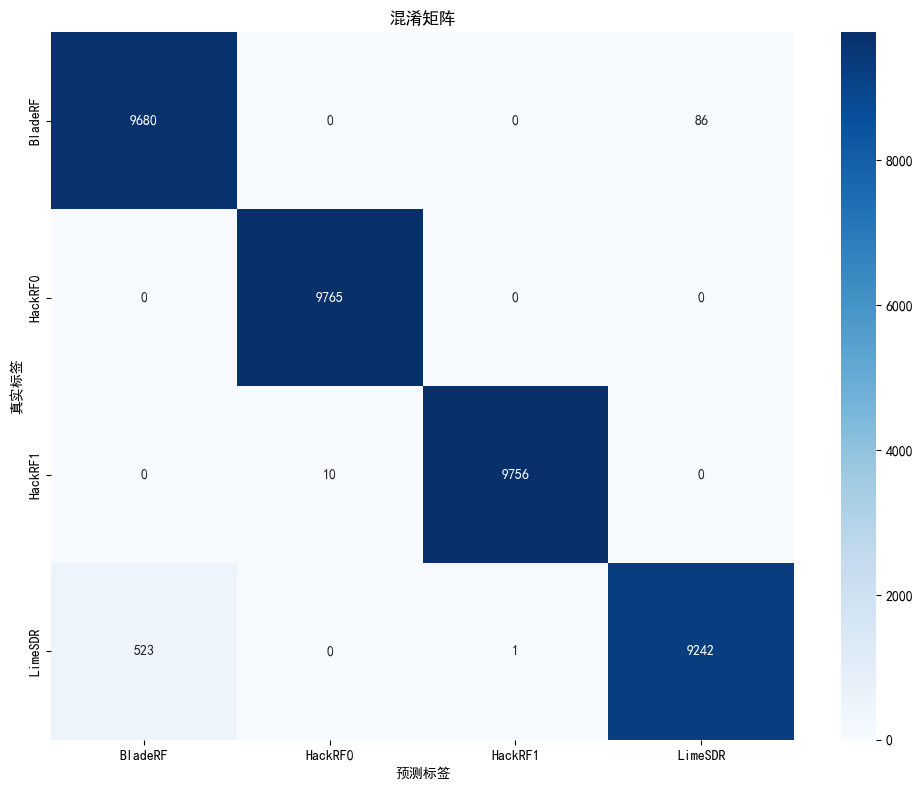

精确率和召回率:
BladeRF - 精确率: 0.9487, 召回率: 0.9912
HackRF0 - 精确率: 0.9990, 召回率: 1.0000
HackRF1 - 精确率: 0.9999, 召回率: 0.9990
LimeSDR - 精确率: 0.9908, 召回率: 0.9463


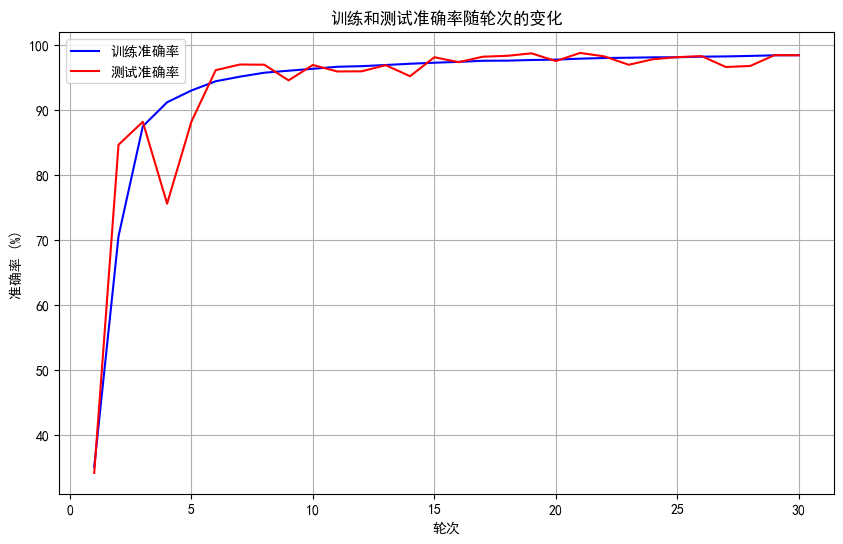

总体准确率: 0.9841


In [34]:
 # 绘制混淆矩阵
class_names = ['BladeRF', 'HackRF0', 'HackRF1', 'LimeSDR']
plot_confusion_matrix(y_true, y_pred, class_names)

# 绘制准确率曲线
plot_accuracy_curve(train_accuracies, test_accuracies)

# 计算总体准确率
accuracy = accuracy_score(y_true, y_pred)
print(f"总体准确率: {accuracy:.4f}")